## Домашняя работа. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [25]:
import pandas as pd
pd.__version__ # 1.4.1

'2.2.3'

In [26]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


1) Выведите последние 10 элеметнов датасета

In [27]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете?

In [28]:
df.shape  

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [29]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [30]:
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.


Отсутствие информации в анкете.
Ошибки в сборе данных.
Неправильное или небрежное заполнение данных.
Пропуски в таких признаках, как workclass, occupation и native-country, могут указывать на то, что информация была не заполнена или не доступна. 


6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [31]:
df['workclass'].value_counts()


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

7) Какой средний возраст женщин и мужчин?

In [32]:
df.groupby('sex')['age'].mean()


sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

8) Постройте гистограмму(bar) распределения образования людей (education)

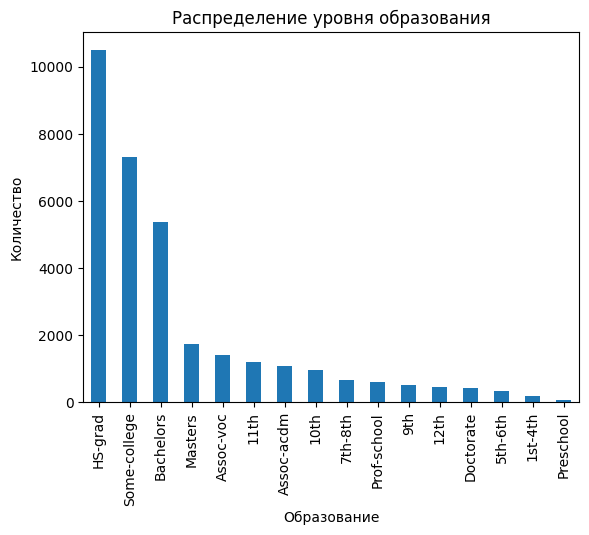

In [33]:
import matplotlib.pyplot as plt

df['education'].value_counts().plot(kind='bar')
plt.xlabel('Образование')
plt.ylabel('Количество')
plt.title('Распределение уровня образования')
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [34]:
df.groupby('income')['age'].agg(['mean', 'std'])


,mean,std
income,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [35]:
high_income = df[df['income'] == '>50K']
high_income_education = high_income['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'])
high_income_education.all()  # Это вернет True, если все имеют высшее образование


np.False_

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [36]:
df['marital_status_group'] = df['marital.status'].apply(lambda x: 'Married' if x.startswith('Married') else 'Single')

df.groupby('marital_status_group')['income'].value_counts(normalize=True)


marital_status_group  income
Married               <=50K     0.563080
                      >50K      0.436920
Single                <=50K     0.935546
                      >50K      0.064454
Name: proportion, dtype: float64

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [40]:


df['income_group'] = df['income'].apply(lambda x: 'High' if x == '>50K' else 'Low')

average_hours = df.groupby(['native.country', 'income_group'])['hours.per.week'].mean().unstack()

print(average_hours)


income_group                     High        Low
native.country                                  
Cambodia                    40.000000  41.416667
Canada                      45.641026  37.914634
China                       38.900000  37.381818
Columbia                    50.000000  38.684211
Cuba                        42.440000  37.985714
Dominican-Republic          47.000000  42.338235
Ecuador                     48.750000  38.041667
El-Salvador                 45.000000  36.030928
England                     44.533333  40.483333
France                      50.750000  41.058824
Germany                     44.977273  39.139785
Greece                      50.625000  41.809524
Guatemala                   36.666667  39.360656
Haiti                       42.750000  36.325000
Holand-Netherlands                NaN  40.000000
Honduras                    60.000000  34.333333
Hong                        45.000000  39.142857
Hungary                     50.000000  31.300000
India               

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [45]:

df['capital_diff'] = df['capital.gain'] - df['capital.loss']

df['capital_diff_category'] = pd.cut(np.sqrt(np.abs(df['capital_diff'])), bins=10, labels=False)


pivot_table = pd.pivot_table(df, 
                             values='capital_diff', 
                             index='education', 
                             columns='capital_diff_category', 
                             aggfunc='count',  # Или 'count' в зависимости от того, что нужно
                             fill_value=0)

print(pivot_table)


capital_diff_category     0    1    2    3  4   5  6   9
education                                               
10th                    868   52    7    2  1   1  0   2
11th                   1096   55   19    5  0   0  0   0
12th                    406   15    8    3  1   0  0   0
1st-4th                 159    8    1    0  0   0  0   0
5th-6th                 308   19    6    0  0   0  0   0
7th-8th                 583   51   11    1  0   0  0   0
9th                     479   30    4    0  0   0  0   1
Assoc-acdm              933   78   36   17  1   1  0   1
Assoc-voc              1198   94   67   19  0   3  0   1
Bachelors              4393  432  286  181  8  14  0  41
Doctorate               285   57   23   25  7   4  0  12
HS-grad                9444  667  285   72  4   6  0  23
Masters                1305  171  121   91  5  11  1  18
Preschool                47    2    1    0  0   0  1   0
Prof-school             363   74   18   60  5  10  0  46
Some-college           6554  43

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [41]:
df['high_salary'] = df['income'] == '>50K'

high_salary_by_country = df[df['sex'] == 'Female'].groupby('native.country')['high_salary'].mean()

high_salary_by_country.sort_values(ascending=False)

native.country
Yugoslavia                    0.333333
Taiwan                        0.266667
France                        0.250000
Iran                          0.250000
Japan                         0.250000
Italy                         0.238095
China                         0.238095
Canada                        0.230769
Greece                        0.200000
Scotland                      0.200000
England                       0.187500
India                         0.181818
Portugal                      0.166667
Hong                          0.166667
Hungary                       0.166667
Philippines                   0.164384
Honduras                      0.142857
Ireland                       0.142857
Laos                          0.125000
Germany                       0.116667
United-States                 0.110721
Poland                        0.105263
South                         0.100000
Thailand                      0.090909
Nicaragua                     0.083333
Cuba      

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [23]:
import numpy as np

def random_salary(row):
    if row['income'] == '<=50K':
        return np.random.uniform(0, 50)
    else:
        return np.random.uniform(51, 200)

df['magic_salary'] = df.apply(random_salary, axis=1)
df.groupby('education')['magic_salary'].mean()

education
10th            32.423827
11th            30.030524
12th            30.800975
1st-4th         31.080119
5th-6th         30.166157
7th-8th         31.548970
9th             30.961596
Assoc-acdm      50.606941
Assoc-voc       51.429048
Bachelors       66.519602
Doctorate       97.714217
HS-grad         41.476537
Masters         81.759889
Preschool       23.195544
Prof-school     99.733055
Some-college    43.943159
Name: magic_salary, dtype: float64